## Avarage True Range

El ATR es otra forma de medir la volatilidad de un activo, en este caso toma en consideración no solo los precios de cierre, sino, además el high y low de la sesión. 

Para su cálculo toma en consideración el rango más alto de estos tres:
- El máximo del día, menos el mínimo del día.
- El máximo del día, menos el cierre del día anterior (valor absoluto).
- El mínimo del día, menos el cierre del día anterior (valor absoluto).

In [3]:
# importar paquetes
import datetime as dt
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [7]:
start = dt.datetime(2018, 1, 1)
end = dt.datetime.now()
data = pdr.get_data_yahoo('NFLX', start, end)
print(data)

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Date                                                                        
2018-01-02 00:00:00-05:00  196.100006  201.649994  195.419998  201.070007   
2018-01-03 00:00:00-05:00  202.050003  206.210007  201.500000  205.050003   
2018-01-04 00:00:00-05:00  206.199997  207.050003  204.000000  205.630005   
2018-01-05 00:00:00-05:00  207.250000  210.020004  205.589996  209.990005   
2018-01-08 00:00:00-05:00  210.020004  212.500000  208.440002  212.050003   
...                               ...         ...         ...         ...   
2023-02-17 00:00:00-05:00  347.910004  349.000000  342.440002  347.959991   
2023-02-21 00:00:00-05:00  342.850006  344.130005  336.420013  337.500000   
2023-02-22 00:00:00-05:00  337.500000  341.910004  332.820007  334.880005   
2023-02-23 00:00:00-05:00  331.230011  331.279999  314.299988  323.649994   
2023-02

### Calculando ATR

In [8]:
# la formula considera 3 tipos de rangos: hight-low, high-cierre previo (absoluto) y low-cierre previo (absoluto)  
high_low = data['High'] - data['Low']
high_cp = np.abs(data['High'] - data['Close'].shift())
low_cp = np.abs(data['Low'] - data['Close'].shift())

# concateno en un df
df = pd.concat([high_low, high_cp, low_cp], axis = 1)
print(df)

                                   0         1          2
Date                                                     
2018-01-02 00:00:00-05:00   6.229996       NaN        NaN
2018-01-03 00:00:00-05:00   4.710007  5.139999   0.429993
2018-01-04 00:00:00-05:00   3.050003  2.000000   1.050003
2018-01-05 00:00:00-05:00   4.430008  4.389999   0.040009
2018-01-08 00:00:00-05:00   4.059998  2.509995   1.550003
...                              ...       ...        ...
2023-02-17 00:00:00-05:00   6.559998  1.709991   8.269989
2023-02-21 00:00:00-05:00   7.709991  3.829987  11.539978
2023-02-22 00:00:00-05:00   9.089996  4.410004   4.679993
2023-02-23 00:00:00-05:00  16.980011  3.600006  20.580017
2023-02-24 00:00:00-05:00   6.980011  2.149994   9.130005

[1296 rows x 3 columns]


In [9]:
# de los tres tipos de rangos calculados filtro solo los mayores
true_range = np.max(df, axis = 1)
true_range

Date
2018-01-02 00:00:00-05:00     6.229996
2018-01-03 00:00:00-05:00     5.139999
2018-01-04 00:00:00-05:00     3.050003
2018-01-05 00:00:00-05:00     4.430008
2018-01-08 00:00:00-05:00     4.059998
                               ...    
2023-02-17 00:00:00-05:00     8.269989
2023-02-21 00:00:00-05:00    11.539978
2023-02-22 00:00:00-05:00     9.089996
2023-02-23 00:00:00-05:00    20.580017
2023-02-24 00:00:00-05:00     9.130005
Length: 1296, dtype: float64

In [19]:
# rolling, promedio de las últimas 14 sesiones de trading, se recomienda entre 7-14.
atr = true_range.rolling(14).mean().dropna()
atr

Date
2018-01-22 00:00:00-05:00     5.445714
2018-01-23 00:00:00-05:00     7.152856
2018-01-24 00:00:00-05:00     7.671427
2018-01-25 00:00:00-05:00     8.315711
2018-01-26 00:00:00-05:00     8.416424
                               ...    
2023-02-17 00:00:00-05:00    11.574291
2023-02-21 00:00:00-05:00    11.881430
2023-02-22 00:00:00-05:00    11.425001
2023-02-23 00:00:00-05:00    12.188572
2023-02-24 00:00:00-05:00    11.381430
Length: 1283, dtype: float64

El resultado es el rango "verdadero" en el cual ha fluctuado la acción cada día, ojo, esto no es términos de porcentaje.

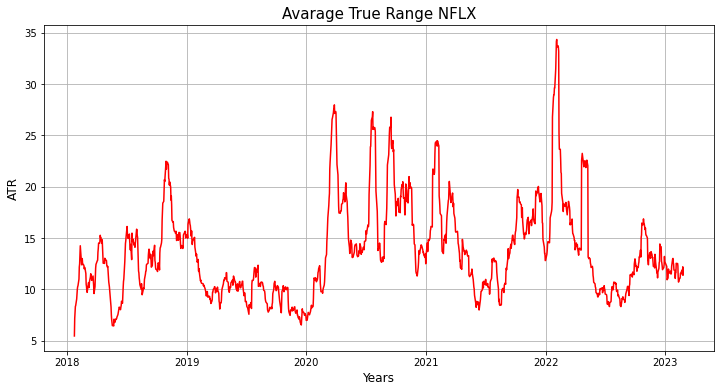

In [22]:
# plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12, 6)) # tamaño del gráfico
plt.plot(atr, color='red')
plt.title('Avarage True Range NFLX', fontsize = 15) # título
plt.ylabel('ATR', fontsize = 12) # etiqueta eje y
plt.xlabel('Years', fontsize = 12) # etiqueta eje x
plt.grid() 
plt.show()

### ATR como porcentaje del cierre previo

In [35]:
# concatenando precios de cierre y atr
close = data['Close']
close_atr = pd.concat([close, atr], axis=1, keys=['Close', 'ATR'])
close_atr.tail()

,Close,ATR
Date,,
2023-02-17 00:00:00-05:00,347.959991,11.574291
2023-02-21 00:00:00-05:00,337.500000,11.881430
2023-02-22 00:00:00-05:00,334.880005,11.425001
2023-02-23 00:00:00-05:00,323.649994,12.188572
2023-02-24 00:00:00-05:00,317.149994,11.381430


In [40]:
# atr como porcentaje del cierre previo
percentage_atr = (close_atr['ATR'] / close_atr['Close'].shift()).dropna()
percentage_atr

Date
2018-01-22 00:00:00-05:00    0.024702
2018-01-23 00:00:00-05:00    0.031430
2018-01-24 00:00:00-05:00    0.030650
2018-01-25 00:00:00-05:00    0.031824
2018-01-26 00:00:00-05:00    0.031207
                               ...   
2023-02-17 00:00:00-05:00    0.033002
2023-02-21 00:00:00-05:00    0.034146
2023-02-22 00:00:00-05:00    0.033852
2023-02-23 00:00:00-05:00    0.036397
2023-02-24 00:00:00-05:00    0.035166
Length: 1283, dtype: float64

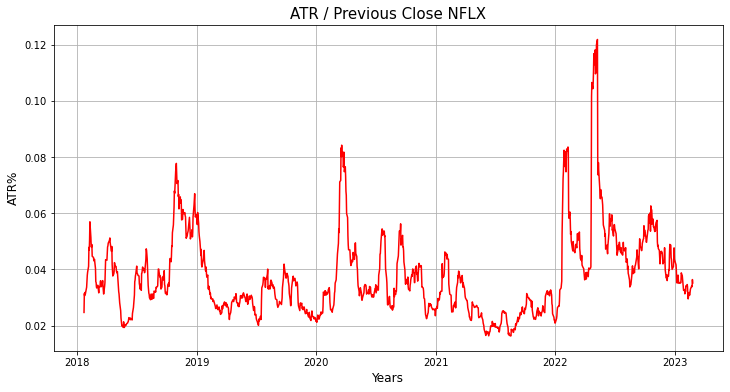

In [42]:
# plot
plt.figure(figsize = (12, 6)) # tamaño del gráfico
plt.plot(percentage_atr, color='red')
plt.title('ATR / Previous Close NFLX', fontsize = 15) # título
plt.ylabel('ATR%', fontsize = 12) # etiqueta eje y
plt.xlabel('Years', fontsize = 12) # etiqueta eje x
plt.grid() 
plt.show()